In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/dataset.csv")
print(df)

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      pixel10  ...  pixel776  pixel777 

In [2]:
class2 = df[df["label"]==1]
mean2=list(np.mean(class2,axis=0))
print("Mean of class 2 is: ")
print(mean2)
std2=list(np.std(class2,axis=0))
print("Standard Deviation of class 2 is: ")
print(std2)
print()

class5 = df[df["label"]==4]
mean5=list(np.mean(class5,axis=0))
print("Mean of class 5 is: ")
print(mean5)
std5=list(np.std(class5,axis=0))
print("Standard Deviation of class 5 is: ")
print(std5)
print()


mean2=np.array(mean2)

mean5=np.array(mean5)

cd = np.linalg.norm(mean2 - mean5)
print("Centroid Distance between class2 and class5 is: ",cd)

Mean of class 2 is: 
[0.0, 0.001, 0.0, 0.05, 0.201, 0.295, 1.468, 3.561, 7.365, 31.121, 114.264, 135.469, 126.645, 124.104, 117.773, 122.313, 123.819, 124.849, 97.164, 25.143, 5.233, 2.408, 0.568, 0.032, 0.013, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.196, 0.264, 0.774, 2.946, 6.421, 14.162, 67.456, 192.687, 208.927, 210.514, 212.741, 209.38, 206.695, 203.805, 195.341, 164.445, 54.126, 10.522, 4.471, 1.717, 0.078, 0.019, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.202, 0.258, 1.221, 3.273, 6.55, 16.966, 90.799, 193.58, 188.564, 187.448, 191.561, 190.821, 184.145, 183.79, 181.689, 166.34, 67.947, 13.235, 4.271, 2.097, 0.142, 0.022, 0.003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.204, 0.321, 1.576, 3.618, 7.633, 22.003, 116.06, 199.136, 188.052, 188.68, 193.25, 191.677, 185.412, 184.387, 183.675, 176.743, 89.489, 16.994, 5.332, 2.449, 0.323, 0.019, 0.008, 0.0, 0.0, 0.0, 0.0, 0.134, 0.214, 0.498, 2.101, 4.434, 8.807, 27.483, 132.894, 195.727, 184.368, 187.455, 192.871, 194.791, 188.028, 184.1, 180.64, 176.628, 103.509, 1

Mean of the data is:  16.432
Standard Deviation of the data is:  1777.2595760000002


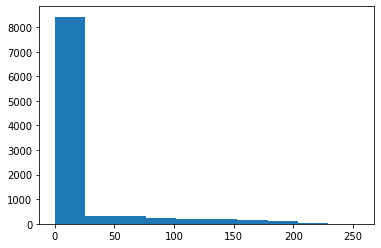

In [3]:
import matplotlib.pyplot as plt
i=0
data=[]
while i<len(df):
    data.append(df["pixel777"][i])
    i+=1
print("Mean of the data is: ",np.mean(data))
print("Standard Deviation of the data is: ",np.var(data))
plt.hist(data)
plt.show()

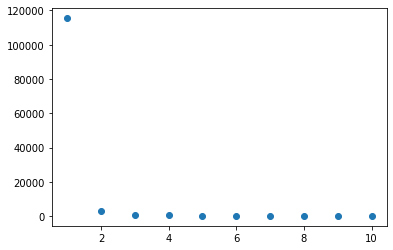

In [4]:
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)
d1 = minkowski_distance(df['pixel776'], df['pixel777'], p=1)
d2 = minkowski_distance(df['pixel776'], df['pixel777'], p=2)
d3 = minkowski_distance(df['pixel776'], df['pixel777'], p=3)
d4 = minkowski_distance(df['pixel776'], df['pixel777'], p=4)
d5 = minkowski_distance(df['pixel776'], df['pixel777'], p=5)
d6 = minkowski_distance(df['pixel776'], df['pixel777'], p=6)
d7 = minkowski_distance(df['pixel776'], df['pixel777'], p=7)
d8 = minkowski_distance(df['pixel776'], df['pixel777'], p=8)
d9 = minkowski_distance(df['pixel776'], df['pixel777'], p=9)
d10 = minkowski_distance(df['pixel776'], df['pixel777'], p=10)
x=[1,2,3,4,5,6,7,8,9,10]
y=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10]
plt.scatter(x, y)

[ 0  0  0 ...  0  0 99]
0.8843333333333333
[  0   0  30 ...   0   0 171]
[0.8841, 0.8269, 0.8072, 0.8018, 0.7969, 0.794, 0.7928, 0.7918, 0.791, 0.7897]


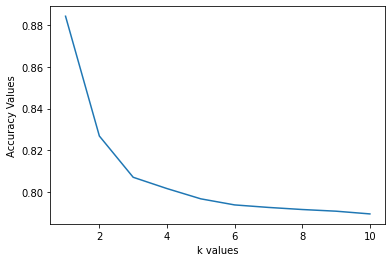

In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,777:-1].values
Y = df.iloc[:,776].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,Y)
neigh.score(x_test, y_test)
print(neigh.predict(x_test))
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, Y)
print(neigh.score(x_test, y_test))
print(neigh.predict(x_test))
value = []
for i in range(1,11):
    neighbours = KNeighborsClassifier(n_neighbors=i)
    neighbours.fit(X,Y)
    value.append(neighbours.score(X,Y))
print(value)
k_values = [1,2,3,4,5,6,7,8,9,10]
plt.plot(k_values,value)
plt.xlabel("k values")
plt.ylabel("Accuracy Values")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import time
df=pd.read_csv("/content/dataset.csv")
print(df)

      pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0          0       0       0       0       0       0       0       9       8   
1          0       0       0       0       0       0       0       0       0   
2          0       0       0       0       0       0      14      53      99   
3          0       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995       0       0       0       0       0       0       0       0       0   
9996       0       0       0       0       0       0       0       0       0   
9997       0       0       0       0       0       0       0       0       0   
9998       0       1       3       0       0       0       0       0       0   
9999       0       0       0       0       0       0       0     140     119   

      pixel10  ...  pixel776  pixel777 

In [7]:
from sklearn import svm
c=svm.SVC()
c.fit(x_train,y_train)
c.support_vectors_

array([[124., 140.,  79., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   3.,   0.],
       [  2.,   4.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 28.,   0.,   2., ...,   0.,   0.,   0.],
       [215.,   0.,   0., ...,   0.,   0.,   0.],
       [125., 130.,   6., ...,   0.,   0.,   0.]])

In [9]:
c=svm.SVC(kernel='linear')
c.fit(x_train,y_train)
st=time.time()
c.fit(x_test,y_test)
print('LINEAR KERNEL- SVM SCORE:',c.score(x_test,y_test))
qu=time.time()
print('TRAINING TIME:',qu-st)

LINEAR KERNEL- SVM SCORE: 0.7966666666666666
TRAINING TIME: 20.803816318511963


In [10]:
c=svm.SVC(kernel='rbf')
c.fit(x_train,y_train)
st=time.time()
c.fit(x_test,y_test)
print('RBF KERNEL - SVM SCORE:',c.score(x_test,y_test))
qu=time.time()
print('TRAINING TIME:',qu-st)

RBF KERNEL - SVM SCORE: 0.7816666666666666
TRAINING TIME: 1.605525016784668


In [11]:
c=svm.SVC(kernel='sigmoid')
c.fit(x_train,y_train)
st=time.time()
c.fit(x_test,y_test)
print('SIGMOID KERNEL - SVM SCORE:',c.score(x_test,y_test))
qu=time.time()
print('TRAINING TIME:',qu-st)

SIGMOID KERNEL - SVM SCORE: 0.78
TRAINING TIME: 1.0843207836151123


In [12]:
st=time.time()
c.fit(x_test,y_test)
print('SVM SCORE:',c.score(x_test,y_test))
qu=time.time()
print('TRAINING TIME:',qu-st)

SVM SCORE: 0.78
TRAINING TIME: 1.0760047435760498


In [13]:
from sklearn.neural_network import MLPClassifier
m=MLPClassifier()
st=time.time()
m.fit(x_train,y_train)
print('MLP SCORE:',m.score(x_train,y_train))
qu=time.time()
print('TRAINING TIME:',qu-st)

MLP SCORE: 0.805
TRAINING TIME: 38.45870518684387


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
import math
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from collections import Counter

In [15]:
df1=pd.read_csv('/content/dataset.csv')
df1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [16]:
train,test=train_test_split(df1,test_size=0.2,random_state=0)
x_train=train.drop(["label"],axis=1)
y_train=train["label"]
x_test=test.drop(["label"],axis=1)
y_test=test["label"]

model1 = DecisionTreeClassifier()
model1 = model1.fit(x_train,y_train)
print("accuracy of training data: ",model1.score(x_train, y_train))
print("depth of tree: ",model1.get_depth())

accuracy of training data:  1.0
depth of tree:  31


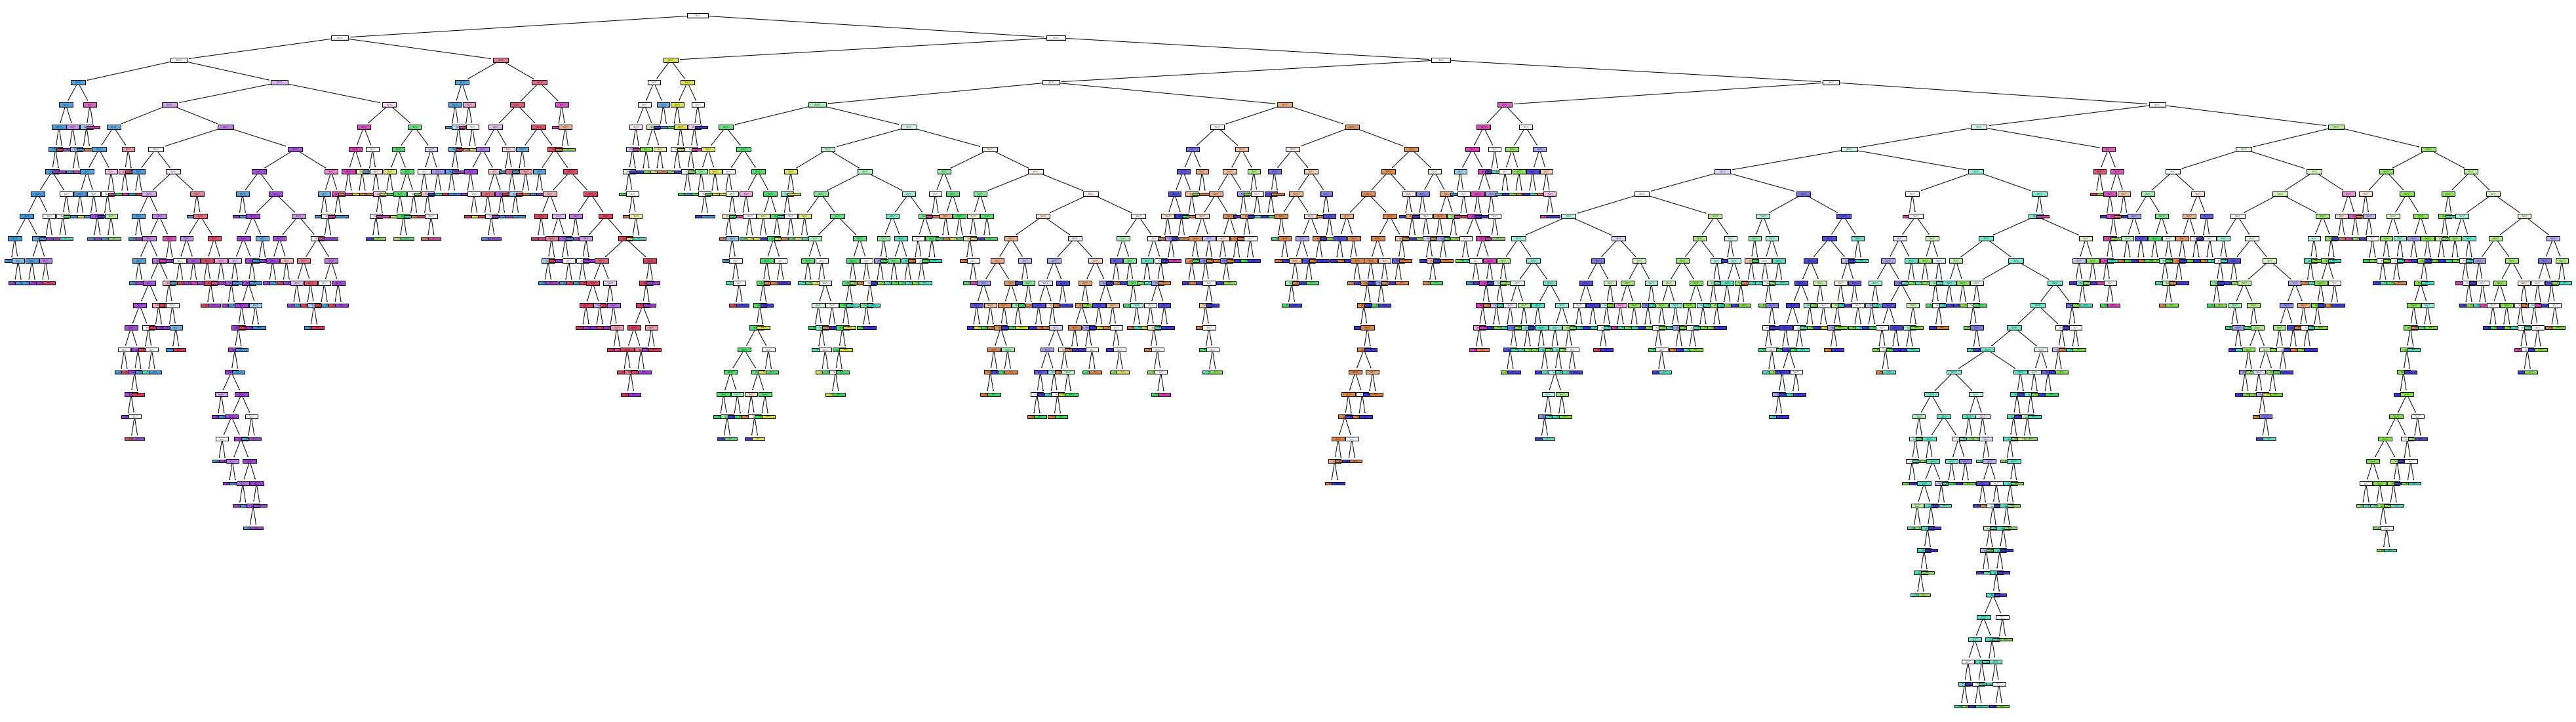

In [17]:
plt.figure(figsize=(70,20))
tree.plot_tree(model1, filled=True)
plt.show()

In [18]:
model2 = DecisionTreeClassifier(max_depth=5)
model2 = model2.fit(x_train,y_train)
print("Training data accuracy: ", model2.score(x_train, y_train))
print("Test data accuracy: ", model2.score(x_test,y_test))
print("depth imposed is: ",model2.get_depth())

Training data accuracy:  0.715875
Test data accuracy:  0.685
depth imposed is:  5


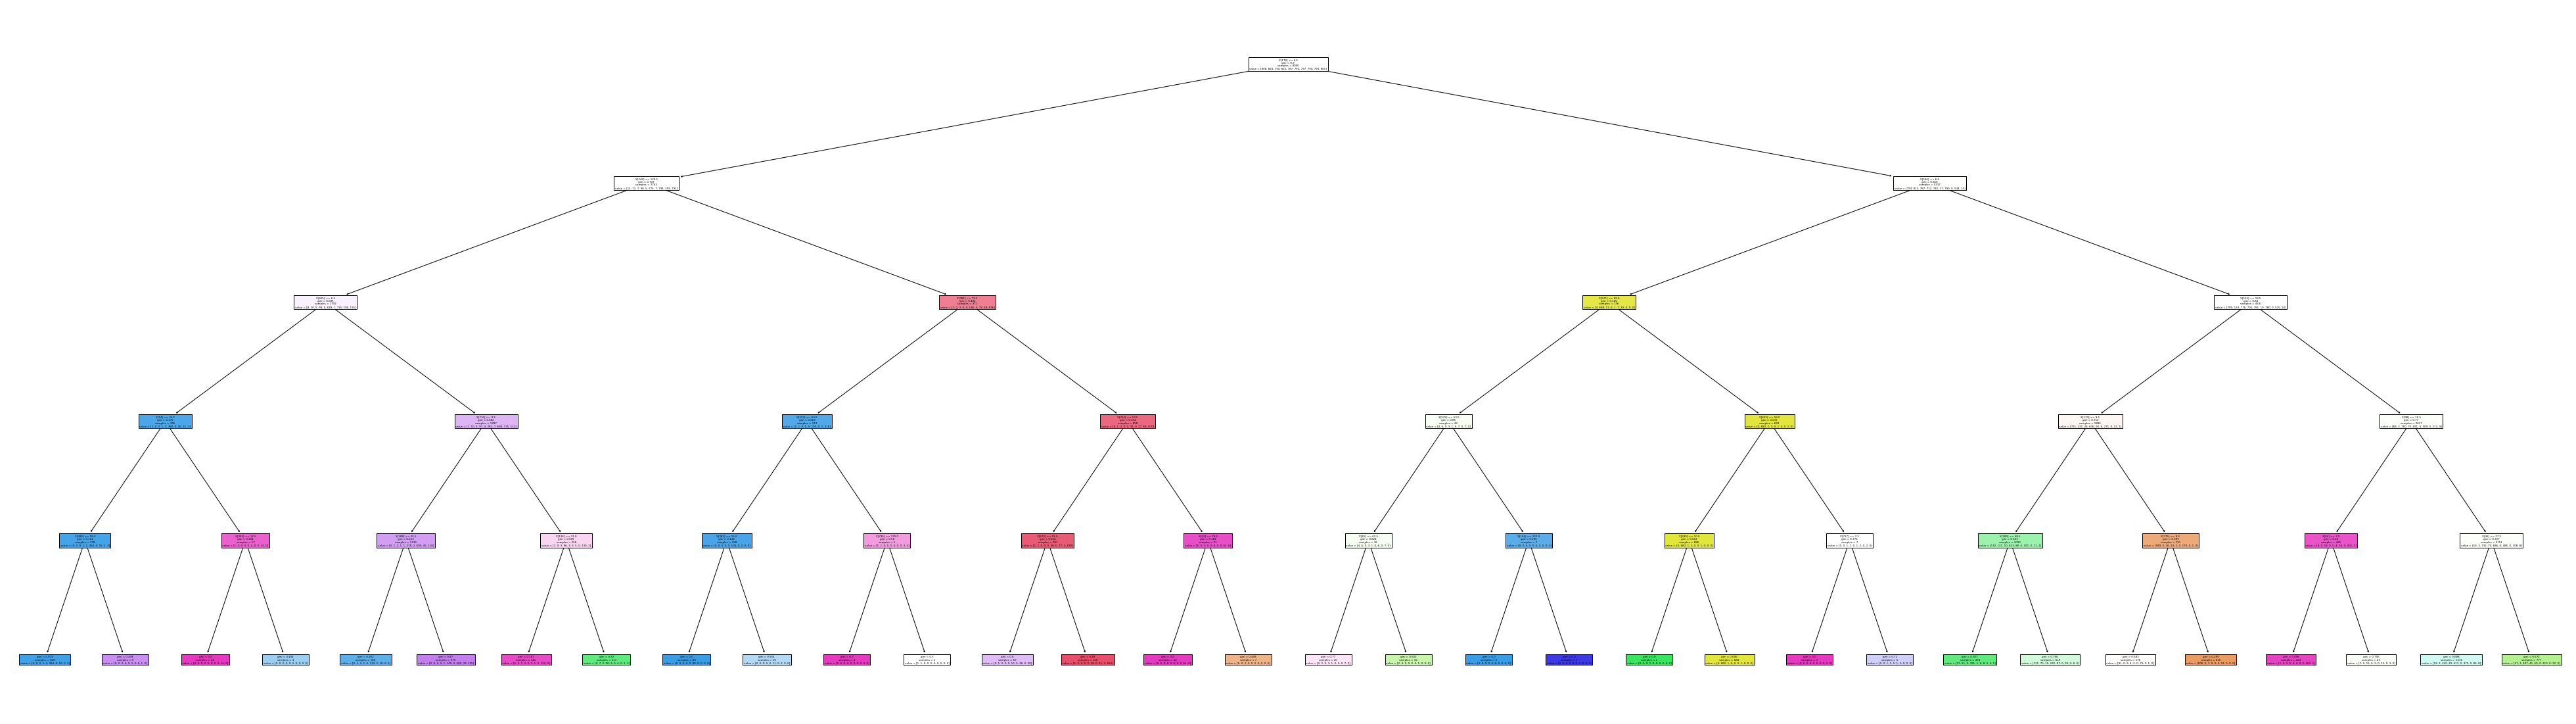

In [19]:
plt.figure(figsize=(70,20))
tree.plot_tree(model2, filled=True)
plt.show()

In [20]:
model3 = DecisionTreeClassifier(criterion='entropy')
model3 = model3.fit(x_train,y_train)
print("Training data accuracy: ", model3.score(x_train, y_train))
print("Test data accuracy: ", model3.score(x_test,y_test))
print("depth of tree: ",model3.get_depth())

Training data accuracy:  1.0
Test data accuracy:  0.75
depth of tree:  21


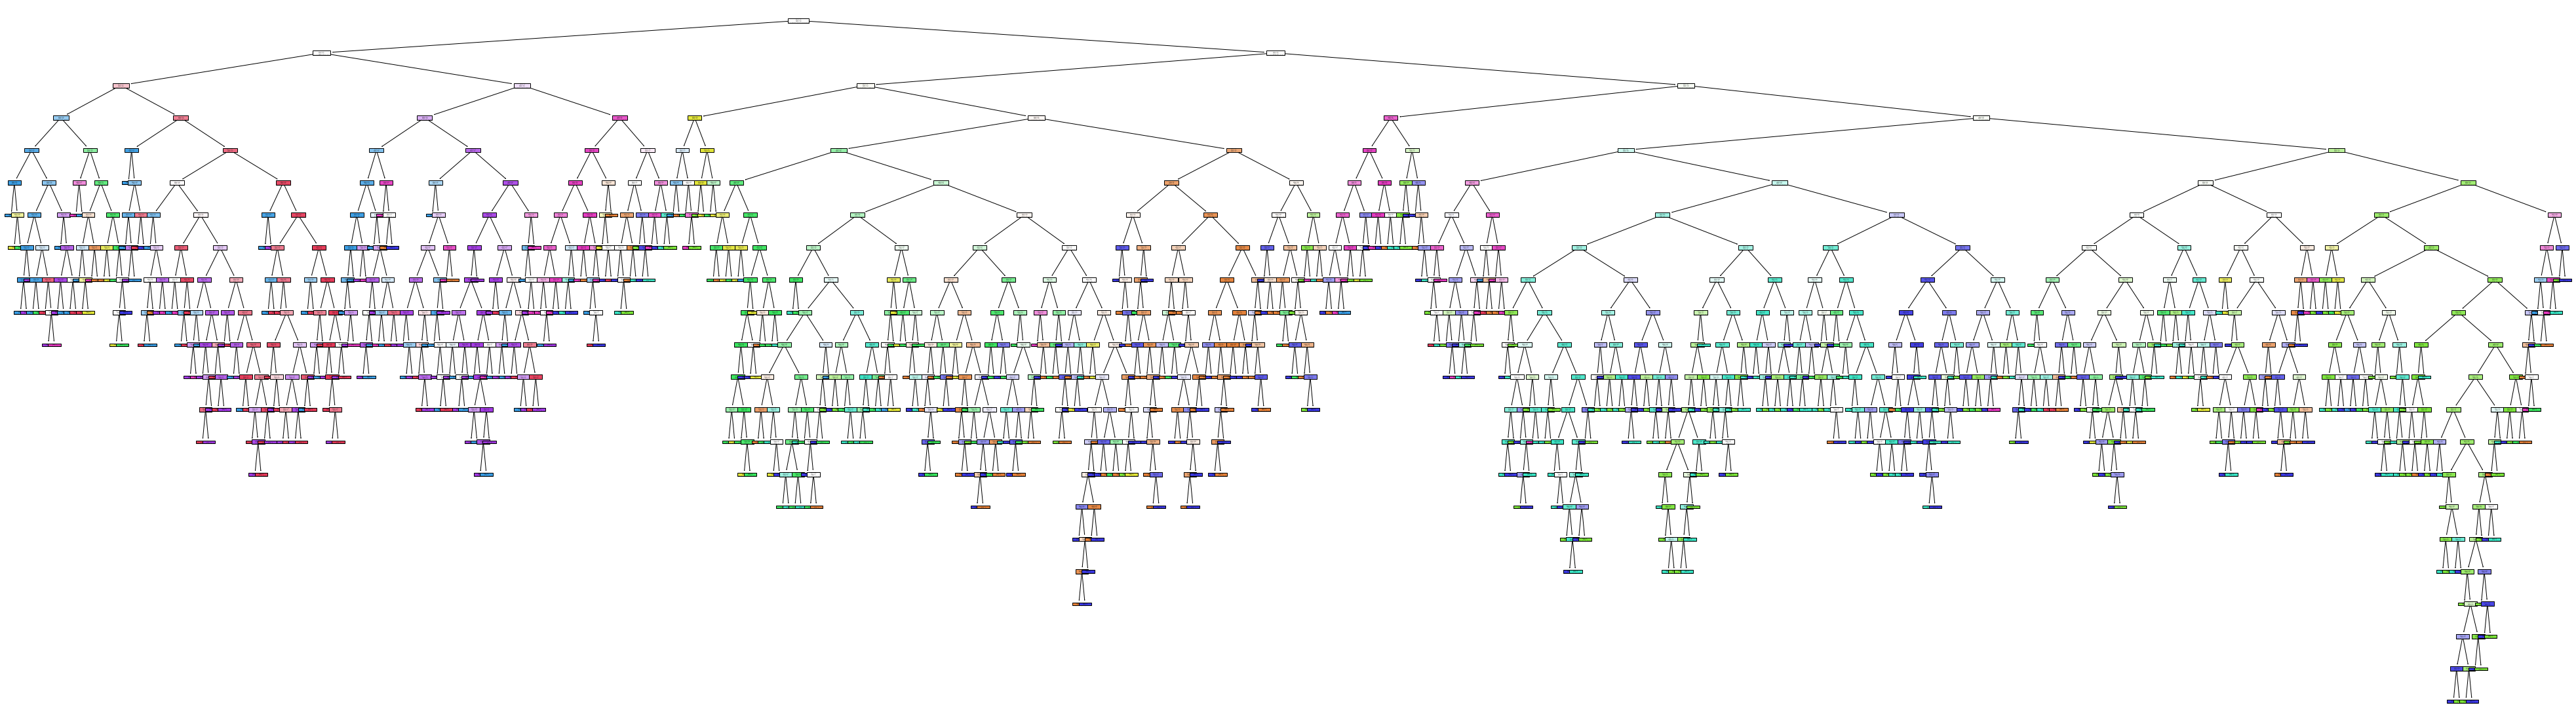

In [22]:
plt.figure(figsize=(70,20))
tree.plot_tree(model3, filled=True)
plt.show()

In [23]:
d1=pd.read_csv('/content/dataset.csv')
d1

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [24]:
d2=d1.loc[0:200000,:]
d2

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [29]:
X=d2.drop(columns=['label'],axis=1)
y=d2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
  
gb = GaussianNB()
gb.fit(X_train, y_train)
  

y_pred = gb.predict(X_test)
print(y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)*100)

[0 5 0 ... 7 3 9]
Accuracy: 57.8


In [30]:
df=pd.read_csv('/content/dataset.csv')
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


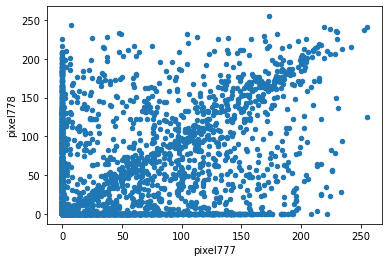

In [31]:
df.plot.scatter(x="pixel777",y="pixel778")
plt.show()

In [32]:
import numpy as np
from sklearn import datasets,linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

In [33]:
X=df['pixel777']
y=df['pixel778']
X_train=X[:-8000]
X_train=X_train.values
X_train_arr1=X_train.reshape(-1,1)
X_test=X[-8000:]
X_test=X_test.values
X_test_arr1=X_test.reshape(-1,1)

y_train=y[:-8000]
y_train=y_train.values
y_train_arr1=y_train.reshape(-1,1)
y_test=y[-8000:]
y_test.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test.fillna(0,inplace=True)
y_test=y_test.values
y_test_arr1=y_test.reshape(-1,1)

In [34]:
model=LinearRegression()
model.fit(X_train_arr1,y_train_arr1)

LinearRegression()

In [35]:
pred=model.predict(X_test_arr1)
print("coefficients:",model.coef_)

coefficients: [[0.52226918]]


In [36]:
mse=mean_squared_error(y_test_arr1,pred)
print("mean squared error:",mse)

mean squared error: 1383.2004863075715


In [37]:
score=r2_score(y_test_arr1,pred)
print("coefficient of determination:",score)
print("score is:",model.score(X_test_arr1,y_test_arr1))

coefficient of determination: 0.3043456565450555
score is: 0.3043456565450555


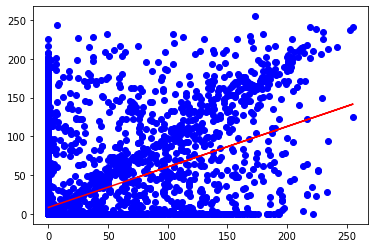

In [38]:
import matplotlib.pyplot as plt
plt.scatter(X_test_arr1,y_test_arr1,color="blue")
plt.plot(X_test_arr1,pred,color="red")

In [39]:
xmean=np.mean(df['pixel777'])
ymean=np.mean(df['pixel778'])
df['num']=(df['pixel777']-xmean)*(df['pixel778']-ymean)
df['den']=(df['pixel777']-xmean)**2
b=df['num'].sum() / df['den'].sum()
a=ymean-(b*xmean)
print("slope value b=",b)
print("intercept=",a)

slope value b= 0.5727374405774478
intercept= 8.459378376431378


In [40]:
X1=df['pixel777']
y1=df['label']
X_train1=X1[:-200]
X_train1=X_train1.values
X_train1_arr1=X_train1.reshape(-1,1)
X_test1=X1[-200:]
X_test1=X_test1.values
X_test1_arr1=X_test1.reshape(-1,1)

y_train1=y1[:-200]
y_train1=y_train1.values
y_train1_arr1=y_train1.reshape(-1,1)
y_test1=y1[-200:]
y_test1.replace([np.inf, -np.inf], np.nan, inplace=True)
y_test1.fillna(0,inplace=True)
y_test1=y_test1.values
y_test1_arr1=y_test1.reshape(-1,1)

In [41]:
from sklearn.linear_model import LogisticRegression
m1=LogisticRegression()
m1.fit(X_train1_arr1,y_train1_arr1)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
m1.predict(X_test1_arr1)

array([7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9,
       7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 0,
       7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       0, 7, 7, 0, 7, 7, 7, 3, 7, 7, 7, 7, 3, 7, 7, 7, 7, 7, 0, 7, 7, 7,
       0, 7, 7, 7, 7, 7, 7, 7, 0, 3, 7, 7, 0, 7, 7, 7, 7, 7, 7, 7, 7, 0,
       5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7,
       7, 7, 8, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 7,
       7, 7, 7, 7, 7, 0, 7, 7, 3, 7, 7, 7, 7, 7, 0, 0, 7, 7, 7, 7, 7, 0,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 3, 7, 0,
       7, 0])

In [43]:
m1.score(X_test1_arr1,y_test1_arr1)

0.155

In [44]:
m1.predict_proba(X_test1_arr1)

array([[5.96060593e-002, 1.08835898e-001, 9.52634675e-002, ...,
        1.26936954e-001, 8.20675652e-002, 1.14749050e-001],
       [5.96060593e-002, 1.08835898e-001, 9.52634675e-002, ...,
        1.26936954e-001, 8.20675652e-002, 1.14749050e-001],
       [5.96060593e-002, 1.08835898e-001, 9.52634675e-002, ...,
        1.26936954e-001, 8.20675652e-002, 1.14749050e-001],
       ...,
       [5.15094567e-001, 1.13947560e-002, 8.22754987e-002, ...,
        6.42713994e-139, 2.01434829e-001, 7.76178789e-004],
       [5.96060593e-002, 1.08835898e-001, 9.52634675e-002, ...,
        1.26936954e-001, 8.20675652e-002, 1.14749050e-001],
       [2.31701357e-001, 6.17526807e-002, 1.35646306e-001, ...,
        2.61560452e-061, 1.84268909e-001, 1.97178431e-002]])

In [45]:
predicted=m1.predict(X_test1_arr1)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test1_arr1,predicted)*100)

Accuracy: 15.5


/usr/local/lib/python3.8/dist-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


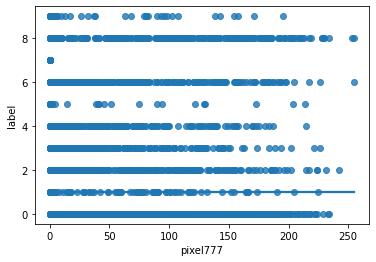

In [46]:
import seaborn as sns
sns.regplot(x=X1,y=y1,data=df,logistic=True)

In [47]:
X2=df.iloc[:,7]
y2=df.iloc[:,29]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
from sklearn.tree import DecisionTreeRegressor
m=DecisionTreeRegressor(criterion='mse')
X2_train=X2_train.values
X2_train=X2_train.reshape(-1,1)
y2_train=y2_train.values
y2_train=y2_train.reshape(-1,1)
X2_test=X2_test.values
X2_test=X2_test.reshape(-1,1)
y2_test=y2_test.values
y2_test=y2_test.reshape(-1,1)
print(m.fit(X2_train,y2_train))
p=m.predict(X2_test)
print(p)
print("mean square error is:",metrics.mean_squared_error(y2_test,p))
print("root mean square error is:",np.sqrt(metrics.mean_squared_error(y2_test,p)))
print("score is:",m.score(X2_test,y2_test))

DecisionTreeRegressor(criterion='mse')
[0.0343945 0.0343945 0.0343945 ... 0.0343945 0.0343945 0.0343945]
mean square error is: 0.5689771432899751
root mean square error is: 0.754305735951925
score is: -0.0005508603714894367


/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X2_train,y2_train)

KNeighborsRegressor()

In [49]:
p1=knn_model.predict(X2_test)
p1

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [50]:
print("mean square error is:",metrics.mean_squared_error(y2_test,p1))
print("root mean square error is:",np.sqrt(metrics.mean_squared_error(y2_test,p1)))
print("score is:",knn_model.score(X2_test,y2_test))

mean square error is: 0.6411866666666667
root mean square error is: 0.8007413231916202
score is: -0.12753188516942693


In [51]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
df=pd.read_csv('/content/dataset.csv')
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,2
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,6
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,8
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,8


In [53]:
d5 = df[df.label == 1].sample(492)
d6=df[df.label == 0].sample(492)
frames=[d5,d6]
d=pd.concat(frames)
d

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
4003,0,0,0,0,0,0,0,0,0,91,...,0,0,0,0,0,0,0,0,0,1
7548,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8803,0,0,0,0,0,0,0,0,38,161,...,132,0,0,0,0,0,0,0,0,1
9096,0,0,0,0,0,0,0,0,0,12,...,194,0,0,0,0,0,0,0,0,1
2089,0,0,0,0,0,0,0,0,0,0,...,31,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,1,0,0,0,48,20,...,41,32,25,0,0,1,0,0,0,0
6531,0,0,0,0,0,0,2,1,0,0,...,199,183,0,0,3,0,0,0,0,0
3036,0,0,0,0,0,0,0,0,0,0,...,56,0,0,0,0,0,0,0,0,0
1314,0,0,0,0,0,0,0,0,0,9,...,29,12,0,0,0,0,0,0,0,0


In [54]:
d=d.drop(['label'],axis=1)
d

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4003,0,0,0,0,0,0,0,0,0,91,...,27,0,0,0,0,0,0,0,0,0
7548,0,0,0,0,0,0,0,0,0,0,...,58,0,0,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,38,161,...,211,132,0,0,0,0,0,0,0,0
9096,0,0,0,0,0,0,0,0,0,12,...,233,194,0,0,0,0,0,0,0,0
2089,0,0,0,0,0,0,0,0,0,0,...,194,31,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,1,0,0,0,48,20,...,45,41,32,25,0,0,1,0,0,0
6531,0,0,0,0,0,0,2,1,0,0,...,192,199,183,0,0,3,0,0,0,0
3036,0,0,0,0,0,0,0,0,0,0,...,90,56,0,0,0,0,0,0,0,0
1314,0,0,0,0,0,0,0,0,0,9,...,111,29,12,0,0,0,0,0,0,0


In [55]:
df=df.drop(['label'],axis=1)
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


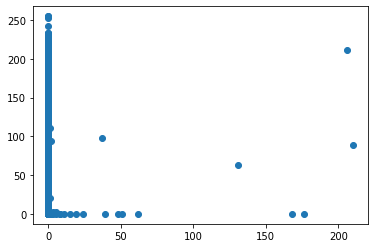

In [56]:
plt.scatter(df['pixel56'],df['pixel777'])

In [57]:
kmeans=KMeans(n_clusters=5)
kmeans

KMeans(n_clusters=5)

In [58]:
y_pred=kmeans.fit_predict(df[['pixel56','pixel777']])
y_pred

array([4, 0, 0, ..., 3, 0, 2], dtype=int32)

In [59]:
print(kmeans.cluster_centers_)

[[8.10616068e-02 4.17557344e-01]
 [2.51256281e-03 1.33424623e+02]
 [8.26086957e-01 8.33369565e+01]
 [8.30645161e-01 1.89447581e+02]
 [1.76366843e-03 3.95449735e+01]]


In [60]:
df['cluster']=y_pred
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
0,0,0,0,0,0,0,0,9,8,0,...,87,56,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,63,53,31,0,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,126,140,0,133,224,222,56,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,14,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,2,52,23,28,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,172,172,182,199,222,42,0,1,0,3
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


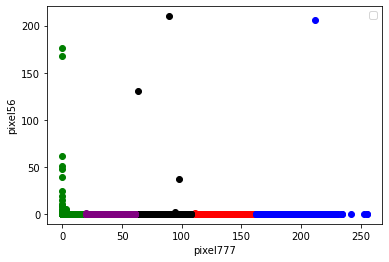

In [61]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]
plt.scatter(df1['pixel777'],df1.pixel56,color='green')
plt.scatter(df2['pixel777'],df2.pixel56,color='red')
plt.scatter(df3['pixel777'],df3.pixel56,color='black')
plt.scatter(df4['pixel777'],df4.pixel56,color='blue')
plt.scatter(df5['pixel777'],df5.pixel56,color='purple')
plt.xlabel('pixel777')
plt.ylabel('pixel56')
plt.legend()

In [62]:
d3 = df.copy()
column = 'pixel777'
d3[column] = (d3[column] - d3[column].min()) / (d3[column].max() - d3[column].min())	
d3

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
0,0,0,0,0,0,0,0,9,8,0,...,87,0.219608,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0.000000,0,63,53,31,0,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,126,0.549020,0,133,224,222,56,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,0.054902,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,2,52,23,28,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,172,0.674510,182,199,222,42,0,1,0,3
9998,0,1,3,0,0,0,0,0,0,0,...,0,0.000000,0,0,1,0,0,0,0,0


In [63]:
kmeans=KMeans(n_clusters=5)
y_pred=kmeans.fit_predict(d3[['pixel56','pixel777']])
y_pred
print(kmeans.cluster_centers_)

[[1.11122234e-02 6.43288009e-02]
 [1.72000000e+02 0.00000000e+00]
 [4.35000000e+01 6.40522876e-02]
 [2.08000000e+02 5.90196078e-01]
 [1.31000000e+02 2.47058824e-01]]


In [65]:
d3['cluster']=y_pred
d3

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,cluster
0,0,0,0,0,0,0,0,9,8,0,...,87,0.219608,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0.000000,0,63,53,31,0,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,126,0.549020,0,133,224,222,56,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,23,0.054902,20,0,0,1,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0.000000,2,52,23,28,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,172,0.674510,182,199,222,42,0,1,0,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0.000000,0,0,1,0,0,0,0,0


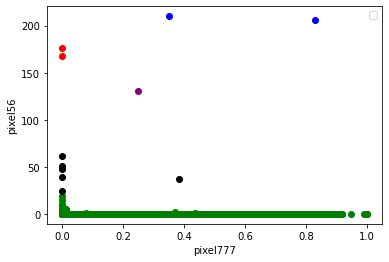

In [66]:
df1=d3[d3.cluster==0]
df2=d3[d3.cluster==1]
df3=d3[d3.cluster==2]
df4=d3[d3.cluster==3]
df5=d3[d3.cluster==4]
plt.scatter(df1['pixel777'],df1.pixel56,color='green')
plt.scatter(df2['pixel777'],df2.pixel56,color='red')
plt.scatter(df3['pixel777'],df3.pixel56,color='black')
plt.scatter(df4['pixel777'],df4.pixel56,color='blue')
plt.scatter(df5['pixel777'],df5.pixel56,color='purple')
plt.xlabel('pixel777')
plt.ylabel('pixel56')
plt.legend()

In [68]:
k_range=range(1,31)
sse=[]
for k in k_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(d3[['pixel56','pixel777']])
    sse.append(kmeans.inertia_)

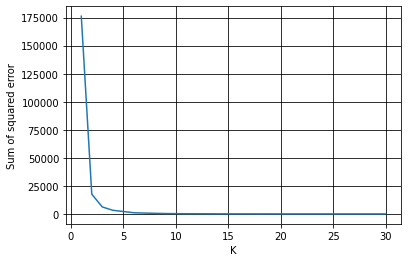

In [69]:
plt.grid(color='black', linestyle='-')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [70]:
d20 = d.copy()
column = 'pixel777'

d20[column] = (d20[column] - d20[column].min()) / (d20[column].max() - d20[column].min())	
d20

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
4003,0,0,0,0,0,0,0,0,0,91,...,27,0,0.000000,0,0,0,0,0,0,0
7548,0,0,0,0,0,0,0,0,0,0,...,58,0,0.000000,0,0,0,0,0,0,0
8803,0,0,0,0,0,0,0,0,38,161,...,211,132,0.000000,0,0,0,0,0,0,0
9096,0,0,0,0,0,0,0,0,0,12,...,233,194,0.000000,0,0,0,0,0,0,0
2089,0,0,0,0,0,0,0,0,0,0,...,194,31,0.000000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0,0,0,0,1,0,0,0,48,20,...,45,41,0.137339,25,0,0,1,0,0,0
6531,0,0,0,0,0,0,2,1,0,0,...,192,199,0.785408,0,0,3,0,0,0,0
3036,0,0,0,0,0,0,0,0,0,0,...,90,56,0.000000,0,0,0,0,0,0,0
1314,0,0,0,0,0,0,0,0,0,9,...,111,29,0.051502,0,0,0,0,0,0,0


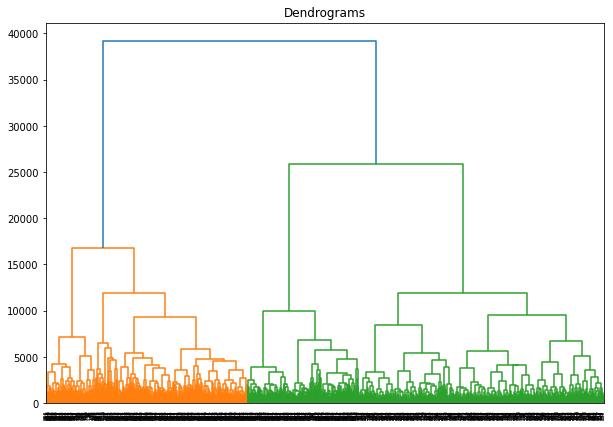

In [71]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(d20, method='ward'))

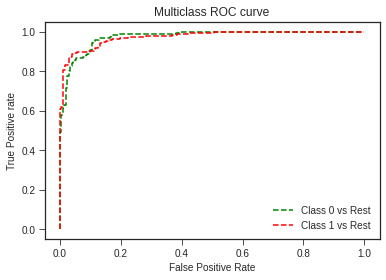

In [77]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, n_informative=3, random_state=42)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class 1 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [78]:
#RidgeClassifier
from sklearn.linear_model import RidgeClassifier
import numpy as np
import time
t0 = time.time()
Rdg = RidgeClassifier()
Rdg.fit(X_train, y_train)
Rdg.fit(X_test, y_test)
print("Training data accuracy: ", Rdg.score(X_train,y_train))
print("Testing data accuracy: ", Rdg.score(X_test,y_test))
t1 = time.time()
print("Time for Training:", t1-t0)
y_pred = Rdg.predict(X_test)

Training data accuracy:  0.8916666666666667
Testing data accuracy:  0.9225
Time for Training: 0.0170440673828125


In [79]:
#Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
import numpy as np
import time
t0 = time.time()
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.fit(X_test, y_test)
print("Training data accuracy: ", sgd.score(X_train,y_train))
print("Testing data accuracy: ", sgd.score(X_test,y_test))
t1 = time.time()
print("Time for Training:", t1-t0)
y_pred = sgd.predict(X_test)

Training data accuracy:  0.8983333333333333
Testing data accuracy:  0.9175
Time for Training: 0.017110586166381836
